In [66]:
import pickle
from matplotlib import pyplot as plt

from TextRepresenter import PorterStemmer
from Index import Index
from Weighter import *
from IRModel import *
from EvalIRModel import *

In [58]:
index = Index("cacm", "cacm/cacm.txt")
#index.indexation()
weighter = WeighterVector(index)
#weighter.calculeNorms()

prepend = '_cacm_w1.pickle'

In [52]:
query_text = 'graph exploration'
ps = PorterStemmer()
query = ps.getTextRepresentation(query_text)
eval_irm = EvalIRModel('cacm/cacm.qry', 'cacm/cacm.rel')

# 1. Modèle de langue

In [2]:
language_model = LanguageModel(weighter)

In [22]:
scores, score_absent = language_model.getScores(query, 0.01)
print(scores, score_absent)

{1116: -7.77230202613155, 1145: -8.09659066093694, 1432: -7.786882995704642, 1456: -8.059230593636029, 1481: -6.299126709281809, 1482: -7.613333234754884, 1504: -7.508139285575236, 1563: -6.7911966449717855, 1727: -8.240186531603864, 1822: -6.9691273966772, 1828: -7.909274786516262, 1847: -8.134677217747265, 1851: -6.7496901801845794, 1916: -8.000852210443908, 1925: -7.939379357274867, 1934: -7.741544021763821, 1935: -7.8405193011979675, 1937: -7.852873192448441, 1947: -7.948870786260537, 1961: -7.898655235191871, 1983: -6.659058178619803, 2015: -7.318666614818047, 2052: -6.925865025508511, 2059: -7.2938340008640346, 2125: -8.052512258149168, 2155: -7.029326307925419, 2161: -6.299126709281809, 2172: -6.219910000255968, 2177: -8.172350549544559, 2178: -8.163446723101043, 2189: -7.858906119711803, 2195: -8.124332389214993, 2289: -7.38197537183115, 2290: -6.4378679894587405, 2368: -7.9758687264019015, 2411: -7.467696852254221, 2430: -6.3714350362241365, 2444: -7.267924566500018, 2447: -7.

In [53]:
language_model.getRanking(query_text, lambd=0.009)[:10]

array([[2461, -6.229003511546964],
       [2934, -6.31565623287385],
       [2172, -6.31565623287385],
       [2752, -6.31565623287385],
       [2790, -6.3940844601087905],
       [1481, -6.3940844601087905],
       [2161, -6.3940844601087905],
       [2430, -6.46561706198474],
       [2290, -6.531286739550306],
       [2476, -6.531286739550306]], dtype=object)

In [42]:
results = eval_irm.evalModel(language_model, ranking_call = lambda m, text: m.getRanking(text, lambd=1))
results

{'precision_recall': array([0.30785998, 0.22579544, 0.22273776, 0.2205578 , 0.21436772,
        0.20303584, 0.19059904, 0.18314702, 0.17685288, 0.17413268,
        0.16986502, 0.16424067, 0.15067168, 0.14365658, 0.14126366,
        0.14119707, 0.13998928, 0.13950089, 0.13950089, 0.13947646]),
 'precision_recall_std': array([0.18448156, 0.05873048, 0.05674185, 0.05663789, 0.0527184 ,
        0.04631093, 0.04045463, 0.03981314, 0.03892413, 0.03930533,
        0.03876168, 0.03611489, 0.02250717, 0.01089997, 0.00867664,
        0.0084288 , 0.00616037, 0.00526003, 0.00526003, 0.00524381]),
 'precision_mean': 0.14482841360361584,
 'precision_mean_std': 0.025912716744740508}

In [41]:
results = eval_irm.evalModel(language_model, ranking_call = lambda m, text: m.getRanking(text, lambd=0.01))
results

{'precision_recall': array([0.33335915, 0.22131794, 0.21828406, 0.21448632, 0.20158016,
        0.18840745, 0.17992398, 0.17304323, 0.16895803, 0.16638396,
        0.16169476, 0.15649455, 0.14757655, 0.1420082 , 0.14070677,
        0.14048153, 0.13981543, 0.13950089, 0.13950089, 0.13947646]),
 'precision_recall_std': array([0.23665181, 0.05738141, 0.05664865, 0.05645964, 0.04528749,
        0.03911002, 0.03495516, 0.03377583, 0.03361843, 0.03254995,
        0.02986675, 0.02521259, 0.01689424, 0.00774926, 0.00682432,
        0.00616851, 0.00555382, 0.00526003, 0.00526003, 0.00524381]),
 'precision_mean': 0.1416873292416284,
 'precision_mean_std': 0.024344052965063843}

In [43]:
results = eval_irm.evalModel(language_model, ranking_call = lambda m, text: m.getRanking(text, lambd=0))
results

{'precision_recall': array([0.41790062, 0.23990436, 0.22561612, 0.20763376, 0.18980525,
        0.17996858, 0.17432248, 0.16920732, 0.16590037, 0.16317974,
        0.15937132, 0.15498508, 0.14665155, 0.14164405, 0.14057276,
        0.14032197, 0.13978297, 0.13950089, 0.13950089, 0.13947646]),
 'precision_recall_std': array([0.23494905, 0.07325164, 0.06052598, 0.04712402, 0.03831104,
        0.03383749, 0.03164816, 0.03114483, 0.03076699, 0.02965819,
        0.02755479, 0.02365908, 0.01505251, 0.00706326, 0.00647972,
        0.00580792, 0.00547178, 0.00526003, 0.00526003, 0.00524381]),
 'precision_mean': 0.14813167781132175,
 'precision_mean_std': 0.026599684302734603}

# 2. Modèle BM25

In [49]:
bm25_model = BM25Model(weighter)

In [55]:
scores = bm25_model.getScores(query)
print(scores)

{1116: 3.701254140824371, 1145: 3.5604339083451353, 1432: 3.6970762941538458, 1456: 3.5838085064603757, 1481: 3.849143562484176, 1482: 3.7392840289816713, 1504: 4.16215160833116, 1563: 4.248533376708161, 1727: 3.4371351630910225, 1822: 3.817737507119405, 1828: 3.6558107763084005, 1847: 3.5335460075779443, 1851: 3.8311342699918316, 1916: 3.61545627358607, 1925: 3.6436101522641096, 1934: 3.7096382251519318, 1935: 3.6804587996967966, 1937: 3.6763277410575737, 1947: 3.6395613541100955, 1961: 3.6598958285120227, 1983: 3.8356207755817, 2015: 4.352013215547412, 2052: 4.398771304587176, 2059: 4.3558717217777065, 2125: 3.587734144267705, 2155: 4.388947364994972, 2161: 3.849143562484176, 2172: 4.276267798200249, 2177: 3.503309997348284, 2178: 3.5108203849905717, 2189: 4.058991634027733, 2195: 3.541186735807108, 2289: 4.509794740288119, 2290: 4.4305055792944525, 2368: 3.627468768810505, 2411: 3.7650744511527092, 2430: 4.270691983629216, 2444: 3.791223105191733, 2447: 3.773750498739745, 2461: 3.85

In [54]:
bm25_model.getRanking(query_text)[:10]

array([[3427, 4.76980309161954],
       [2630, 4.516539681539986],
       [2289, 4.509794740288119],
       [2619, 4.479477615193987],
       [2484, 4.437000010562084],
       [2290, 4.4305055792944525],
       [2052, 4.398771304587176],
       [2155, 4.388947364994972],
       [3139, 4.383074035616494],
       [2980, 4.35973707600276]], dtype=object)

In [57]:
results = eval_irm.evalModel(bm25_model, ranking_call = lambda m, text: m.getRanking(text))
results

{'precision_recall': array([0.80646037, 0.42024303, 0.33677446, 0.28692281, 0.24224905,
        0.21812124, 0.19468182, 0.17471625, 0.16234577, 0.15872218,
        0.15665195, 0.15264657, 0.14468008, 0.14154419, 0.14009106,
        0.14009106, 0.13956581, 0.13950089, 0.13950089, 0.13947646]),
 'precision_recall_std': array([0.27615616, 0.180272  , 0.1455764 , 0.11771888, 0.09139604,
        0.07953659, 0.06916163, 0.0498536 , 0.03262849, 0.02738312,
        0.0251064 , 0.02030985, 0.01118872, 0.00789314, 0.00571836,
        0.00571836, 0.0052252 , 0.00526003, 0.00526003, 0.00524381]),
 'precision_mean': 0.18550940983078806,
 'precision_mean_std': 0.052413227078218855}

# 3. Optimisation des paramètres
## 3.1 Language Model

In [68]:
lambda_values = np.geomspace(1e-5, 1, 100)

In [ ]:
search = GridSearch(param_a_name="lambd", param_a_values=lambda_values)
results = search.search(language_model)
lang_results = np.array(results)

In [ ]:
with open('models/lang_results'+prepend, 'wb') as f:
    pickle.dump(lang_results, f, protocol=4)

In [69]:
with open('models/lang_results'+prepend, 'rb') as f:
    lang_results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'models/lang_results_cacm_w1.pickle'

In [ ]:
lambda_values = np.linspace(0,1,100)
#lambda_values = np.geomspace(1e-5, 1, 100)
plt.title("Modéle de langue - GridSearch")
plt.plot(lambda_values, lang_results[:,1])
plt.xlabel("Lambda")
plt.xticks(lambda_values, rotation='vertical');

## 3.2 BM25 Model

In [63]:
param_a_values = np.linspace(1, 2, 20)
param_b_values = list(np.linspace(0.5, 1, 20))

In [ ]:
search = GridSearch(param_a_name="k1", param_a_values=param_a_values, param_b_name="b", param_b_values=param_b_values)
results = search.search(bm25_model)
bm25_results = np.array(results)
bm25_results

In [ ]:
with open('models/bm25_results'+prepend, 'wb') as f:
    pickle.dump(bm25_results, f, protocol=4)

In [60]:
with open('models/bm25_results'+prepend, 'rb') as f:
    bm25_results = pickle.load(f)

In [64]:
bm25_matrix = np.array(bm25_results[:, 1].reshape(20, 20), dtype=np.float)
# k1 : ligne, b : colonnes
idx = np.argmax(bm25_matrix)
print(param_a_values[idx//20], param_b_values[idx%20], np.max(bm25_matrix))

2.0 0.9473684210526315 0.2071255839897062


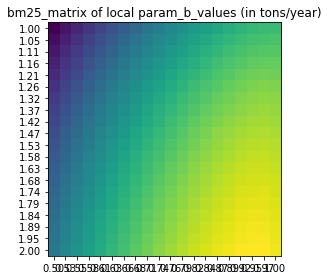

In [67]:
fig, ax = plt.subplots()
im = ax.imshow(bm25_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(len(param_b_values)))
ax.set_yticks(np.arange(len(param_a_values)))
# ... and label them with the respective list entries
ax.set_xticklabels(['{:.2f}'.format(k1v) for k1v in param_b_values])
ax.set_yticklabels(['{:.2f}'.format(k1v) for k1v in param_a_values])

# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(param_a_values)):
#    for j in range(len(param_b_values)):
#        text = ax.text(j, i, bm25_matrix[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("bm25_matrix of local param_b_values (in tons/year)")
#fmt = StrMethodFormatter('{x}')
#ax.yaxis.set_major_formatter(fmt)

fig.tight_layout()
plt.show()